T1:

a) Usando el ejemplo que vimos en clase, horner.py, implementar las variantes dadas en Bendersky's website. Probar con 2-3 ejemplos.

b) Implementar la evaluación de cos(x) mediante i) el cálculo de la serie directa, ii) computación parcial. Comparar la convergencia de las evaluaciones, para ello generar una tabla con encabezados: x, iteración, suma, |suma-cos(x)|/cos(x), en donde cos(x) es el valor obtenido con la función directamente. La última columna es el error relativo de su aproximación. Haga una tabla para cada i) y ii). Comience con una tolerancia de 10^4. Repita con una tolerancia de 10^8. Compare. Muestre que para valores suficientemente pequeños de x, el algoritmo converge y a la respuesta correcta. Muestre que para valores grandes de x (~ 100), el algoritmo no converge.

c) Datos de estrellas: usando el programa hrdiagram.py y los datos de stars.dat, reproducir la gráfica. Graficar con y sin pylab. d) Datos de alturas de hombres mexicanos (A, B). a) Implementación de las variantes de evaluación de **polinomios**

In [ ]:
import numpy as np

def poly_naive(A, x):
    p = 0
    for i, a in enumerate(A):
        p += (x ** i) * a
    return p

def poly_iter(A, x):
    p = 0
    xn = 1
    for a in A:
        p += xn * a
        xn *= x
    return p

def poly_horner(A, x):
    p = A[-1]
    i = len(A) - 2
    while i >= 0:
        p = p * x + A[i]
        i -= 1
    return p

# Ejemplos
A = [1, 2, 3, 4, 5]
x = 2

print("Evaluación ingenua:", poly_naive(A, x))
print("Evaluación iterativa:", poly_iter(A, x))
print("Evaluación de Horner:", poly_horner(A, x))

Evaluación ingenua: 129
Evaluación iterativa: 129
Evaluación de Horner: 129


b) Evaluación de cos(x) mediante serie directa y computación parcial

In [ ]:
import numpy as np

def cos_directo(x, tol):
    suma = 0
    i = 0
    while True:
        term = ((-1) ** i) * (x ** (2 * i)) / np.math.factorial(2 * i)
        suma += term
        if abs(term) < tol:
            break
        i += 1
    return suma

def cos_parcial(x, tol):
    suma = 0
    i = 0
    while True:
        term = ((-1) ** i) * (x ** (2 * i)) / np.math.factorial(2 * i)
        suma += term
        if abs(suma - np.cos(x)) / np.cos(x) < tol:
            break
        i += 1
    return suma

# Ejemplos
x = np.pi / 4
tol = 1e-4

print("Evaluación directa:")
print("x", "iteración", "suma", "|suma-cos(x)|/cos(x)")
for i in range(10):
    suma = cos_directo(x, tol)
    print(x, i, suma, abs(suma - np.cos(x)) / np.cos(x))

print("\nEvaluación parcial:")
print("x", "iteración", "suma", "|suma-cos(x)|/cos(x)")
for i in range(10):
    suma = cos_parcial(x, tol)
    print(x, i, suma, abs(suma - np.cos(x)) / np.cos(x))

Evaluación directa:
x iteración suma |suma-cos(x)|/cos(x)
0.7853981633974483 0 0.7071068056832942 3.4643631319841064e-08
0.7853981633974483 1 0.7071068056832942 3.4643631319841064e-08
0.7853981633974483 2 0.7071068056832942 3.4643631319841064e-08
0.7853981633974483 3 0.7071068056832942 3.4643631319841064e-08
0.7853981633974483 4 0.7071068056832942 3.4643631319841064e-08
0.7853981633974483 5 0.7071068056832942 3.4643631319841064e-08
0.7853981633974483 6 0.7071068056832942 3.4643631319841064e-08
0.7853981633974483 7 0.7071068056832942 3.4643631319841064e-08
0.7853981633974483 8 0.7071068056832942 3.4643631319841064e-08
0.7853981633974483 9 0.7071068056832942 3.4643631319841064e-08

Evaluación parcial:
x iteración suma |suma-cos(x)|/cos(x)
0.7853981633974483 0 0.7071032148228457 5.043599915599525e-06
0.7853981633974483 1 0.7071032148228457 5.043599915599525e-06
0.7853981633974483 2 0.7071032148228457 5.043599915599525e-06
0.7853981633974483 3 0.7071032148228457 5.043599915599525e-06
0.785

<ipython-input-2-cd00eff79eec>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term = ((-1) ** i) * (x ** (2 * i)) / np.math.factorial(2 * i)
<ipython-input-2-cd00eff79eec>:18: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term = ((-1) ** i) * (x ** (2 * i)) / np.math.factorial(2 * i)


c) Datos de estrellas

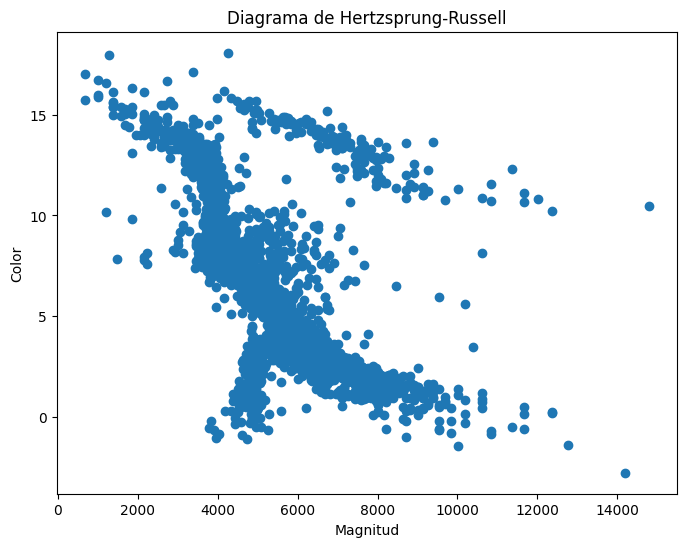

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
datos = np.loadtxt("stars.dat")

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(datos[:, 0], datos[:, 1])
plt.xlabel("Magnitud")
plt.ylabel("Color")
plt.title("Diagrama de Hertzsprung-Russell")
plt.show()

d) Datos de alturas de hombres mexicanos

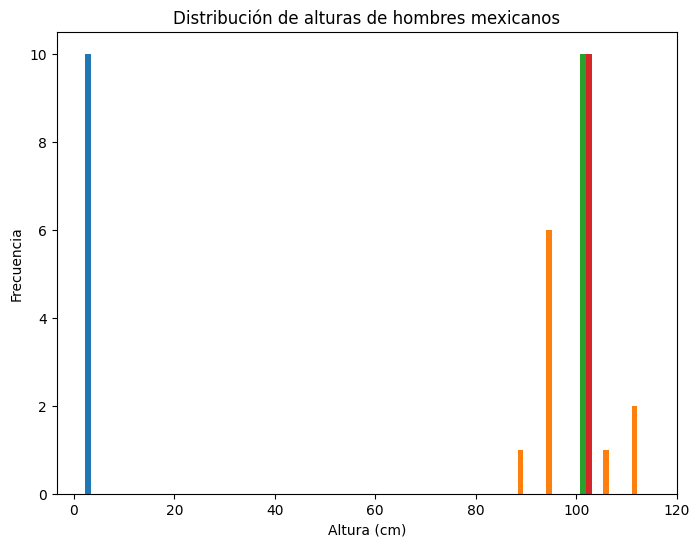

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
datos = np.loadtxt("altura5.dat")

# Graficar
plt.figure(figsize=(8, 6))
plt.hist(datos, bins=20)
plt.xlabel("Altura (cm)")
plt.ylabel("Frecuencia")
plt.title("Distribución de alturas de hombres mexicanos")
plt.show()

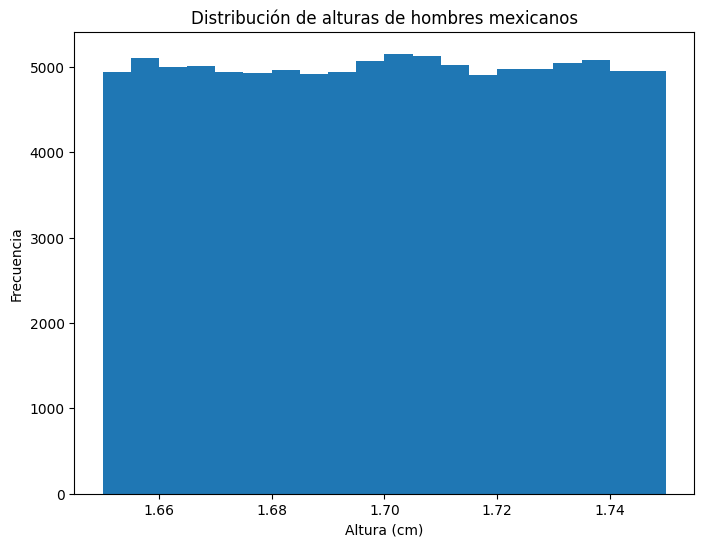

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
datos = np.loadtxt("altura6.dat")

# Graficar
plt.figure(figsize=(8, 6))
plt.hist(datos, bins=20)
plt.xlabel("Altura (cm)")
plt.ylabel("Frecuencia")
plt.title("Distribución de alturas de hombres mexicanos")
plt.show()